# 104人力銀行網站爬蟲練習
## 從104人力銀行網站爬取求職公司資訊。

In [1]:
import time
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.common.keys import Keys

### 首先進入104人力銀行網站：https://www.104.com.tw/cust/list/index/
### 在"地區"及"產業"下拉式選單中，選擇你希望的選項，然後按下"找公司"按鈕。

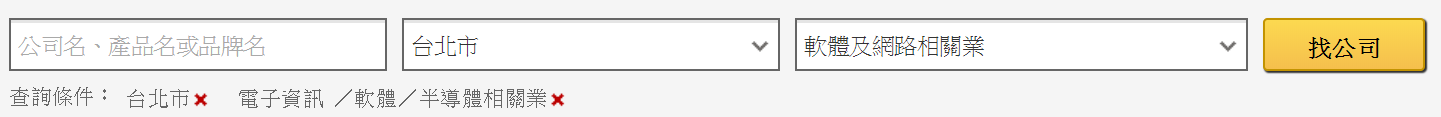

### 開啟新網頁後，觀察新的網址內容，把網址複製下來。

In [2]:
job_104_url = "https://www.104.com.tw/cust/list/index/?page=1&order=1&mode=s&jobsource=checkc&area=6001001000&indcat=1004000000"

### 開始爬取搜尋結果

In [5]:
browser = webdriver.Chrome(executable_path='c:\投資\chromedriver_win32\chromedriver')
browser.get(job_104_url)  # 打開瀏覽器並連到網頁
time.sleep(2)  # delay一段時間等待網頁更新完成

while True:
    time.sleep(3)  # delay一段時間等待網頁更新完成
    html = browser.page_source
    soup = BeautifulSoup(html, 'lxml')
    company_list = soup.find("div", attrs={'id':"company-result"}).find_all("article", attrs={'class':"items"})
    
    #
    # 擷取公司名稱及簡介內容
    #
    for company in company_list:
        # 因為內容太多，我們把爬取到的結果，寫入"company_list.txt"檔案中，稍後再來檢視
        company_name = company.a.string
        f = open("company_list.txt", "a+", encoding='utf-8')
        f.write( company_name + "\n" )  # 寫入公司名稱
        
        company_desc = company.find("p", attrs={'class':"desc"})
        f.write( company_desc.string + "\n" )  # 寫入公司簡介
        f.write( "--------------------------------------------------------------------------------" + "\n" )
        f.close()
        print(company_name)
        print("---------")
        print(company_desc)

    '''
    
    接下來請學員練習，定位到「下一頁」按鈕。(可以利用find_element_by_link_text("xxx")的函式)
    如果還有下一頁，利用Selenium模擬click「下一頁」按鈕的動作。(定位到物件後，利用其click()屬性)
    若沒有下一頁了，離開爬取的流程
    
    Your code here
    
    '''
    # 抓到最後一頁
    if soup.find('a', class_='page-next disabled'):
        print('==========沒有下一頁了==========')
        # 3.關閉瀏覽器
        browser.quit()
        break
    # 按下一頁
    time.sleep(2)
    browser.find_element_by_link_text("下一頁").click()
    time.sleep(2)

恩平方財經股份有限公司
---------
<p class="desc">【MacroMicro是亞洲首家以總體經濟為出發點的投資資訊平台。 】

我們透過經濟邏輯以及數理分析找出數字與投資間的關聯性，以友善自動化的圖表協助大家以最短時間了解投資趨勢。
短短的三年內，M平方成長快速，更於2017年獲選...</p>
法商法國巴黎銀行股份有限公司台北分公司
---------
<p class="desc">法國巴黎銀行：領先歐洲 放眼全球

法國巴黎銀行為歐洲銀行及金融服務翹楚，集團業務遍佈全球74個國家及城市，僱用近192,092名員工，其中一半駐守四個本地市場（比利時、法國、意大利及盧森堡）。

法國巴黎銀行於1981年在台...</p>
某國際商業銀行股份有限公司
---------
<p class="desc">日盛金融控股(日盛國際商業銀行股份有限公司)創立於民國0年，主要從事0；擁有為數不少的客戶群。

　　本公司擁有優秀的經營團隊，秉持著『0』的經營理念，追求企業永續經營及成長；除整體營運穩定外，獲利狀況也逐年提昇，是國內...</p>
第一金證券股份有限公司
---------
<p class="desc">◎第一金證券股份有限公司
第一金證券股份有限公司成立於民國77年，成立之初以經紀業務為主，繼而於86年加入自營及承銷業務成為綜合券商，於89年開始辦理股務代理業務及成立金融商品部，進而使業務功能更加完備。92年8月正式加入...</p>
富邦人壽保險股份有限公司_和美展業處(黃健華)(核准文號108A02號)
---------
<p class="desc">富邦人壽以穩健經營策略締造佳績，屢獲國內外專業獎項肯定，包括七度榮獲《世界金融雜誌》評為台灣最佳保險公司、囊括保險信望愛獎17項大獎肯定、蟬聯亞洲企業商會AREA亞洲企業社會責任獎—社會公益發展獎、連續八年獲頒「保險龍鳳...</p>
優客工場好康報抱創業投資股份有限公司
---------
<p class="desc">好康報抱成立於2015年12月12日，平台起始於創始人徐正文先生的微信社群。創群一天內即達到500人的上限，並隨著強大的核心團隊，一年之內到達100多個群。至今已是規模龐大的台商社群之一。好康報抱致力於提供商業、文化、生活交流...</p>
(總公司)南山人壽保險

富邦人壽保險股份有限公司_中奕通訊處(傅進孟)(核准文號108A01號)
---------
<p class="desc" data-reactid=".0.1:$1a2x6bjch3.0.4">富邦人壽以穩健經營策略締造佳績，屢獲國內外專業獎項肯定，包括七度榮獲評為台灣最佳保險公司、囊括保險信望愛獎17項大獎肯定、蟬聯亞洲企業商會AREA亞洲企業社會責任獎-社會公益發展獎、連續八年獲頒「保險龍鳳獎」最嚮往的壽險...</p>
永達保險經紀人股份有限公司
---------
<p class="desc" data-reactid=".0.1:$5trtc08.0.4">永達保險經紀人股份有限公司於2001年3月獲准成立，由具備壽險業精算師資格的董事長吳文永先生，與一群保險菁英共組專業經營團隊，至2015年累計實收資本額為新台幣玖億捌仟貳佰萬元，歷年來無論是新契約保費、有效契約保費、營業收...</p>
國泰人壽保險股份有限公司_專招博愛通訊處(陳中和)
---------
<p class="desc" data-reactid=".0.1:$1jt7oss.0.4">國泰人壽保險股份有限公司(以下稱國泰人壽)成立於民國51年，在保險業務初設階段，肩負著保險業開拓者之使命，歷經50餘年的競爭與挑戰，始終秉持著誠信正直的核心價值，兢兢業業為全臺灣的民眾服務，目前客戶數近800萬人，有效契約...</p>
黑潮數位金融股份有限公司
---------
<p class="desc" data-reactid=".0.1:$1a2x6bl379.0.4">公司創立於民國107年，由創易加（Startupgp）分割成立
主要從事金融服務業 第三方支付公司，擁有為數不少的大型客戶群。
本公司擁有優秀的經營團隊，追求企業永續經營成長。整體營運穩定，獲利狀況也逐年提升，是國內績優廠商之一...</p>
南山人壽保險股份有限公司_順可通訊處(林奕成)
---------
<p class="desc" data-reactid=".0.1:$1a2x6bj5qz.0.4">歡迎至 南山人壽網站 了解我們
http://www.nanshanlife.com.tw</p>
能率亞洲資本股份有限公司
---------
<p class="desc" data-reactid=".

富邦人壽保險股份有限公司_南嘉通訊處(彭士軒)(核准文號108A01號)
---------
<p class="desc" data-reactid=".0.1:$1a2x6bjy97.0.4">富邦人壽以穩健經營策略締造佳績，屢獲國內外專業獎項肯定，包括七度榮獲《世界金融雜誌》評 為台灣最佳保險公司、囊括保險信望愛獎 17 項大獎肯定、蟬聯亞洲企業商會 AREA 亞洲企業社會責 任獎—社會公益發展獎、連續八年獲頒「保...</p>
新安東京海上產物保險股份有限公司
---------
<p class="desc" data-reactid=".0.1:$7qey3yw.0.4">1999年成立的新安東京海上產險，是由台灣在地國際化的標竿企業裕隆集團，及日本東京海上保險集團共同投資。結合兩大股東的利基優勢，交織成綿密的服務據點及通路，加上專業的關懷貼心與快速準確的效率，提供消費者最優質、最多樣...</p>
基利心環球投資有限公司
---------
<p class="desc" data-reactid=".0.1:$1a2x6bk5wf.0.4">GERIZIM Capital Management Ltd. is a professional wealth management advisory firm providing Family Office services to international clients with the special focus on Grater China high net worth families.</p>
富邦人壽保險股份有限公司_安康展業處(蔡汶伶)(核准文號108A02號)
---------
<p class="desc" data-reactid=".0.1:$1a2x6bl2pr.0.4">富邦人壽以穩健經營策略締造佳績，屢獲國內外專業獎項肯定，包括七度榮獲《世界金融雜誌》評為台灣最佳保險公司、囊括保險信望愛獎17項大獎肯定、蟬聯亞洲企業商會AREA亞洲企業社會責任獎—社會公益發展獎、連續八年獲頒「保險龍鳳...</p>
富邦人壽保險股份有限公司_南赫通訊處(徐信帛) (核准文號108A01號)
---------
<p class="desc" data-reactid=".0.1:$1a2x6

臺灣企銀國際租賃股份有限公司
---------
<p class="desc" data-reactid=".0.1:$1a2x6birbs.0.4">　　本公司為臺灣中小企業銀行100%轉投資之子公司，成立於2013年4月，提供多元化的服務項目，包括租賃業務、分期付款業務等。本公司以熱心服務的態度，為企業主提供全方位的金融服務，成為臺灣百萬中小企業之最佳後盾，未來透過臺...</p>
富邦人壽保險股份有限公司_高富小港分處(核准文號108A01號)
---------
<p class="desc" data-reactid=".0.1:$1a2x6bka6p.0.4">富邦人壽以穩健經營策略締造佳績，屢獲國內外專業獎項肯定，包括七度榮獲《世界金融雜誌》評為台灣最佳保險公司、囊括保險信望愛獎17項大獎肯定、蟬聯亞洲企業商會AREA亞洲企業社會責任獎—社會公益發展獎、連續八年獲頒「保險龍鳳...</p>
聯邦商業銀行股份有限公司
---------
<p class="desc" data-reactid=".0.1:$13okwde9.0.4">民國七十八年春，台北及高雄地區士紳李存敬、林榮三、李玉泉先生等人，為配合政府開放民營銀行設立及響應金融事業現代化、自由化、國際化之政策，乃結合企業界、金融界、學術界志同道合的民間朋友籌組「聯邦商業銀行」，以「熱忱...</p>
富邦人壽保險股份有限公司_屏光通訊處(卓玉琪)(核准文號：108A01號)
---------
<p class="desc" data-reactid=".0.1:$1a2x6bkmgr.0.4">富邦人壽以穩健經營策略締造佳績，屢獲國內外專業獎項肯定，包括七度榮獲《世界金融雜誌》評為台灣最佳保險公司、囊括保險信望愛獎17項大獎肯定、蟬聯亞洲企業商會AREA亞洲企業社會責任獎—社會公益發展獎、連續八年獲頒「保險龍鳳...</p>
富邦人壽花岳通訊處(核准文號108A01號)
---------
<p class="desc" data-reactid=".0.1:$ctztkrx.0.4">富邦人壽以穩健經營策略締造佳績，屢獲國內外專業獎項肯定，包括七度榮獲《世界金融雜誌》評為台灣最佳保險公司、囊括保險信望愛獎17項大獎肯定、蟬聯亞洲企業商會AREA亞洲企業社會責任獎—社會公益發展獎、連續八年獲

富邦人壽保險股份有限公司_鳳北展業處(孫雍勝)(核准文號108A02號)
---------
<p class="desc" data-reactid=".0.1:$1a2x6bjtpi.0.4">富邦人壽以穩健經營策略締造佳績，屢獲國內外專業獎項肯定，包括七度榮獲《世界金融雜誌》評為台灣最佳保險公司、囊括保險信望愛獎17項大獎肯定、蟬聯亞洲企業商會AREA亞洲企業社會責任獎—社會公益發展獎、連續八年獲頒「保險龍鳳...</p>
阿爾發金融科技股份有限公司
---------
<p class="desc" data-reactid=".0.1:$1a2x6bk4cl.0.4">阿爾發金融科技由全球知名外商銀行 Citi 花旗集團前任副總裁：陳志彥 (James)  於2017年所創辦，我們專注研發「Robo Advisor」機器人理財系統，使用全球 ETF 打造投資人投資組合，並將Behavioral Finance 行為財務學實際應用於投...</p>
富邦人壽保險股份有限公司_中奕通訊處(賴宥榛)(核准文號108A01號)
---------
<p class="desc" data-reactid=".0.1:$1a2x6biuw3.0.4">富邦人壽以穩健經營策略締造佳績，屢獲國內外專業獎項肯定，包括七度榮獲《世界金融雜誌》評為台灣最佳保險公司、囊括保險信望愛獎 17 項大獎肯定、蟬聯亞洲企業商會 AREA  亞洲企業社會責任獎—社會公益發展獎、連續八年獲頒「保...</p>
富邦人壽保險股份有限公司_富六通訊處(楊博元)(核准文號：108A01號)
---------
<p class="desc" data-reactid=".0.1:$1a2x6bl1nf.0.4">富邦人壽以穩健經營策略締造佳績，屢獲國內外專業獎項肯定，包括七度榮獲《世界金融雜誌》評為台灣最佳保險公司、囊括保險信望愛獎17項大獎肯定、蟬聯亞洲企業商會AREA亞洲企業社會責任獎—社會公益發展獎、連續八年獲頒「保險龍鳳...</p>
富邦人壽保險股份有限公司_東湖獨立課(林書宇)(核准文號108A02號)
---------
<p class="desc" data-reactid=".0.1:$1a2x6bjyis.0.4">富邦人壽以穩健經營策略締造佳績，屢獲國內外專業獎項肯定，包

宇澔股份有限公司
---------
<p class="desc" data-reactid=".0.1:$1a2x6biy6a.0.4">我們重視每一位員工，除了有良好工作環境、也提供學習及成長的空間，歡迎優秀的朋友一起加入宇澔投資開發股份有限公司的工作行列。</p>
財團法人住宅地震保險基金
---------
<p class="desc" data-reactid=".0.1:$6ocvh00.0.4">民國88年9月21日台灣發生芮氏規模7.3級的強烈地震，人員及財產損失皆十分嚴重，全國經濟損失達3,000億元，房屋全倒51,712戶，半倒53,768戶，住宅財產損失計1,284億元，而投保住宅火險附加地震險的比率僅約千分之二，無法從保險機...</p>
富邦人壽_富豪通訊處(核准文號108A01號)
---------
<p class="desc" data-reactid=".0.1:$1a2x6bi7wp.0.4">富邦人壽以穩健經營策略締造佳績，屢獲國內外專業獎項肯定，包括七度榮獲《世界金融雜誌》評為台灣最佳保險公司、囊括保險信望愛獎17項大獎肯定、蟬聯亞洲企業商會AREA亞洲企業社會責任獎—社會公益發展獎、連續八年獲頒「保險龍鳳...</p>
富邦人壽保險股份有限公司_富翊通訊處(張準玲)(核准文號108A01號)
---------
<p class="desc" data-reactid=".0.1:$1a2x6bjsqt.0.4">富邦人壽以穩健經營策略締造佳績，屢獲國內外專業獎項肯定，包括七度榮獲《世界金融雜誌》評為台灣最佳保險公司、囊括保險信望愛獎17項大獎肯定、蟬聯亞洲企業商會AREA亞洲企業社會責任獎—社會公益發展獎、連續八年獲頒「保險龍鳳...</p>
華冠投顧_華冠證券投資顧問股份有限公司
---------
<p class="desc" data-reactid=".0.1:$7fdplao.0.4">本公司為經政府核准設立之投顧公司，強調正派、專業經營，目前有數位資深分析師，平時均透過電視、廣播等媒體或舉辦投資說明會等方式服務廣大投資朋友，今為擴大編制，歡迎對金融證券業有濃厚興趣者，共同加入我們的行列。</p>
富蘭克林證券投資顧問股份有限公司
---------
<p class="desc" data-reacti

<p class="desc" data-reactid=".0.1:$1a2x6bkkxp.0.4">富邦人壽以穩健經營策略締造佳績，屢獲國內外專業獎項肯定，包括七度榮獲《世界金融雜誌》評為台灣最佳保險公司、囊括保險信望愛獎17項大獎肯定、蟬聯亞洲企業商會AREA亞洲企業社會責任獎—社會公益發展獎、連續八年獲頒「保險龍鳳...</p>
富邦人壽保險股份有限公司_南騰四分處(吳堡憓)(核准文號108A01號)
---------
<p class="desc" data-reactid=".0.1:$1a2x6bjk34.0.4">      富邦人壽以穩健經營策略締造佳績，屢獲國內外專業獎項肯定,包括七度榮獲《世界金融雜誌》評為台灣最佳保險公司，囊括保險信望愛獎17項大獎肯定、蟬聯亞洲企業商會ＡＲＥＡ亞洲企業社會責任獎-社會公益發展獎，連續八年獲頒...</p>
南山人壽保險股份有限公司_重益通訊處
---------
<p class="desc" data-reactid=".0.1:$59glz0w.0.4">https://www.nanshanlife.com.tw/</p>
富邦人壽保險股份有限公司_富顥通訊處(何青馨)(核准文號108A01號)
---------
<p class="desc" data-reactid=".0.1:$1a2x6bix6n.0.4">富邦人壽以穩健經營策略締造佳績，屢獲國內外專業獎項肯定，包括七度榮獲《世界金融雜誌》評為台灣最佳保險公司、囊括保險信望愛獎17項大獎肯定、蟬聯亞洲企業商會AREA亞洲企業社會責任獎—社會公益發展獎、連續八年獲頒「保險龍鳳...</p>
富邦人壽_石牌展業處(林雍傑)(核准文號108A02號)
---------
<p class="desc" data-reactid=".0.1:$1a2x6bjsw3.0.4">富邦人壽以穩健經營策略締造佳績，屢獲國內外專業獎項肯定，包括七度榮獲《世界金融雜誌》評為台灣最佳保險公司、囊括保險信望愛獎17項大獎肯定、蟬聯亞洲企業商會AREA亞洲企業社會責任獎—社會公益發展獎、連續八年獲頒「保險龍鳳...</p>
富邦人壽保險股份有限公司_南沅通訊處(鄭貴文處經理)(核准文號108A01)
---------
<p class="desc" data-re

國泰人壽保險股份有限公司_富凱通訊處(詹羽喬)認證編碼20190905YD1002
---------
<p class="desc" data-reactid=".0.1:$1a2x6bi3yi.0.4">國泰人壽保險股份有限公司(以下稱國泰人壽)成立於民國51年，在保險業務初設階段，肩負著保險業開拓者之使命，歷經50餘年的競爭與挑戰，始終秉持著誠信正直的核心價值，兢兢業業為全臺灣的民眾服務，目前客戶數近800萬人，有效契約...</p>
詠豐鑫有限公司
---------
<p class="desc" data-reactid=".0.1:$1a2x6bkt4s.0.4">本公司重視每一位員工...
有良好工作環境..享勞健保
歡迎喜歡穩定成長的求職者
加入詠豐鑫的工作團隊</p>
京鼎資產管理有限公司
---------
<p class="desc" data-reactid=".0.1:$1a2x6bkzxu.0.4">本公司擁有優秀的經營團隊，秉持著『服務客戶、分享員工』經營理念，追求企業永續經營成長。
我們重視每一位員工，有良好工作環境，也提供學習及成長空間，歡迎優秀的朋友一起加入。
整體營運穩定，獲利狀況也逐年提升，目前台北...</p>
富邦人壽保險股份有限公司_富姚通訊處(陳麗君)(核准文號108A01號)
---------
<p class="desc" data-reactid=".0.1:$1a2x6bkzyb.0.4">富邦人壽以穩健經營策略締造佳績，屢獲國內外專業獎項肯定，包括七度榮獲《世界金融雜誌》評為台灣最佳保險公司、囊括保險信望愛獎17項大獎肯定、蟬聯亞洲企業商會AREA亞洲企業社會責任獎—社會公益發展獎、連續八年獲頒「保險龍鳳...</p>
南山人壽保險股份有限公司_鴻億通訊處(黃子建)
---------
<p class="desc" data-reactid=".0.1:$59glzei.0.4">成立時間：西元1963年7月
經營理念：在地深耕，永續經營。尊重夥伴，合作共享。關懷誠信，不負所託。
www.nanshanlife.com.tw</p>
遠雄人壽保險事業股份有限公司_太邑營業處
---------
<p class="desc" data-reactid=".0.1:$1a2x6bkvzt.0.4">  

南山人壽保險股份有限公司_群真通訊處(張育誠)
---------
<p class="desc" data-reactid=".0.1:$59glzbl.0.4">請上官方網站http://www.nanshanlife.com.tw查詢　　</p>
富邦人壽保險股份有限公司_富也三重分處(郭麗卿)(核准文號108A01號)
---------
<p class="desc" data-reactid=".0.1:$1a2x6bkzeo.0.4">富邦人壽以穩健經營策略締造佳績，屢獲國內外專業獎項肯定，包括七度榮獲《世界金融雜誌》評為台灣最佳保險公司、囊括保險信望愛獎17項大獎肯定、蟬聯亞洲企業商會AREA亞洲企業社會責任獎—社會公益發展獎、連續八年獲頒「保險龍鳳...</p>
錠嵂保險經紀人股份有限公司_北三營業處(陳鴻明)
---------
<p class="desc" data-reactid=".0.1:$1a2x6bkd78.0.4">【公司現況】
錠嵂正式設立登記於1991年，深耕台灣保險市場長達25年，是台灣少數具大型規模保險經紀人公司之一，現階段擁有超過2,000位專業從業人員，營業據點遍布台灣北、中、南，及東部，多達26處，是全台唯一獲得連續六屆國家...</p>
國泰當舖
---------
<p class="desc" data-reactid=".0.1:$1a2x6bkzdq.0.4">我們重視每一位員工，除了有良好工作環境、也提供學習及成長的空間，歡迎優秀的朋友一起加入國泰當舖的工作行列。</p>
台灣樂天信用卡股份有限公司
---------
<p class="desc" data-reactid=".0.1:$1a2x6biw16.0.4">樂天集團創辦人三木谷浩史，1965年生於日本神戶，畢業於日本一橋大學，其後到美國哈佛商學院取得碩士學位。樂天市場創業於1997年，時值日本經濟泡沫失落十年的尾聲，社會氣氛逐漸從深沉的文化反省，凝聚成正面的奮起力量，當時32...</p>
富邦人壽保險股份有限公司_富達通訊處(核准文號108A01號)
---------
<p class="desc" data-reactid=".0.1:$1a2x6bk3hj.0.4">富邦人壽以穩健經營策略締造佳績，屢獲國內外專業獎項肯定，包括七度榮

<p class="desc" data-reactid=".0.1:$1a2x6bju3e.0.4">富邦人壽以穩健經營策略締造佳績，屢獲國內外專業獎項肯定，包括七度榮獲《世界金融雜誌》評為台灣最佳保險公司、囊括保險信望愛獎17項大獎肯定、蟬聯亞洲企業商會AREA亞洲企業社會責任獎—社會公益發展獎、連續八年獲頒「保險龍鳳...</p>
富邦人壽保險股份有限公司_中彰大雅分處(陳雅湞)(核准文號108A01號)
---------
<p class="desc" data-reactid=".0.1:$1a2x6bkf04.0.4">富邦人壽以穩健經營策略締造佳績，屢獲國內外專業獎項肯定，包括七度榮獲《世界金融雜誌》評為台灣最佳保險公司、囊括保險信望愛獎17項大獎肯定、蟬聯亞洲企業商會AREA亞洲企業社會責任獎—社會公益發展獎、連續八年獲頒「保險龍鳳...</p>
香港商錢匯發展有限公司台灣分公司
---------
<p class="desc" data-reactid=".0.1:$1a2x6bkjkw.0.4">　　以「台灣第一家依法成立的互聯網金融平台」為目標，MoneySQ務求提供合法、安全、具公信力的網路平台，讓投資者能更靈活運用手上的資金獲取回報，亦幫助借款者把握機會、達成夢想，從而達到「互動分享，增值財富」這個企業核心...</p>
誼遠實業股份有限公司
---------
<p class="desc" data-reactid=".0.1:$wbje6i0.0.4">誼遠控股體系-創業投資, 資產管理, 長期投資項目包括航運業, 產險業, 紙業及科技事業等.</p>
富邦人壽保險股份有限公司_中貿一分處(張世鵬)(核准文號108A01號)
---------
<p class="desc" data-reactid=".0.1:$1a2x6bkiqn.0.4">富邦人壽以穩健經營策略締造佳績，屢獲國內外專業獎項肯定，包括七度榮獲《世界金融雜誌》評為台灣最佳保險公司、囊括保險信望愛獎17項大獎肯定、蟬聯亞洲企業商會AREA亞洲企業社會責任獎—社會公益發展獎、連續八年獲頒「保險龍鳳...</p>
國泰人壽保險股份有限公司_專招中山通訊處(林志霖)
---------
<p class="desc" data-reactid=".0.1:$1jt7o

六和國際保險代理人股份有限公司
---------
<p class="desc" data-reactid=".0.1:$1a2x6bi5wr.0.4">六和國際保險代理人公司成立於2003年，由六和企業集團投資設立，專責服務六和集團之財產保險業務，同時亦代理十餘家不同汽車品牌總代理及經銷商汽車保險業務。目前與11家產險公司簽訂財產保險代理合約。
六和企業集團是一跨國性...</p>
南山人壽保險股份有限公司_景暘通訊處(陳美玲)
---------
<p class="desc" data-reactid=".0.1:$1a2x6bk3y0.0.4">詳-南山人壽網站www.nanshanlife.com.tw</p>
富邦人壽_富贏通訊處(陳雅蓮)(核准文號108A01號)
---------
<p class="desc" data-reactid=".0.1:$1a2x6bk5po.0.4">富邦人壽以穩健經營策略締造佳績，屢獲國內外專業獎項肯定，包括七度榮獲《世界金融雜誌》評為台灣最佳保險公司、囊括保險信望愛獎17項大獎肯定、蟬聯亞洲企業商會AREA亞洲企業社會責任獎—社會公益發展獎、連續八年獲頒「保險龍鳳...</p>
富邦人壽保險股份有限公司_富悅通訊處(蔡其安)(核准文號108A01號)
---------
<p class="desc" data-reactid=".0.1:$1a2x6bjpnx.0.4">富邦人壽以穩健經營策略締造佳績，屢獲國內外專業獎項肯定，包括七度榮獲《世界金融雜誌》評
為台灣最佳保險公司、囊括保險信望愛獎 17 項大獎肯定、蟬聯亞洲企業商會 AREA 亞洲企業社會責任獎—社會公益發展獎、連續八年獲頒「保...</p>
富邦人壽_文山展業處(核准文號:108A02號)
---------
<p class="desc" data-reactid=".0.1:$1a2x6bj1b2.0.4">富邦人壽以穩健經營策略締造佳績，屢獲國內外專業獎項肯定，包括七度榮獲《世界金融雜誌》評為台灣最佳保險公司、囊括保險信望愛獎17項大獎肯定、蟬聯亞洲企業商會AREA亞洲企業社會責任獎—社會公益發展獎、連續八年獲頒「保險龍鳳...</p>
富邦人壽_高明通訊處(顏裕融)(核准文號核准文號108A01號)
---------
<p class

台灣人壽保險股份有限公司_富寓通訊處(葉志強)(核淮文號北二字第108008號)
---------
<p class="desc" data-reactid=".0.1:$1a2x6bi986.0.4">為強化金融服務的廣度，提供客戶更多元的金融服務，中信金控積極規劃跨入保險事業的經營，2011年11月併購美商大都會保險金融集團（MetLife, Inc.）在臺子公司100%股權，2012年1月更名為中國信託人壽保險（股）公司（以下簡稱「中...</p>
國茶企業股份有限公司
---------
<p class="desc" data-reactid=".0.1:$1a2x6bk6jx.0.4">我們重視每一位員工，除了有良好工作環境、也提供學習及成長的空間，歡迎優秀的朋友一起加入國茶企業股份有限公司的工作行列。</p>
國泰綜合證券股份有限公司
---------
<p class="desc" data-reactid=".0.1:$cifpbp4.0.4">為朝金融事業國際化、多元化的發展趨勢，國泰金控董事會於2004年2月6日通過設立國泰綜合證券，於全體同仁共同戮力下，國泰證券於8月13日正式開業，成為國泰金控的成員之ㄧ，國泰證券的成立，完整了集團的產品線並增強跨業行銷的實...</p>
臺灣工銀租賃股份有限公司
---------
<p class="desc" data-reactid=".0.1:$ocofgcw.0.4">臺灣工銀租賃股份有限公司(以下簡稱”本公司”)為王道銀行百分之百轉投資的子公司。王道銀行向來秉持誠信、創新、專業、效率的服務理念，在董事長駱錦明先生的領導下積極擴展集團規模，於2011年4月成立本公司，期能為客戶提供全方位...</p>
佳朋保險經紀人股份有限公司
---------
<p class="desc" data-reactid=".0.1:$b6i48wg.0.4">日本SOMPO Holdings 在台灣獨資之保險服務據點，總公司於1888年成立，在全球32個國家地區擁有據點。
1984年SOMPO在台成立台北聯絡處，隨後於2009年改制成立保險經紀人公司，為日系企業提供專業的保險相關諮詢，並以高質優良的服務...</p>
富邦人壽保險股份有限公司_桃晶通訊處(徐雪華)(核准文號108A01號)
--------

富邦人壽保險股份有限公司_竹一通訊處(羅永成)(核准文號108A01號)
---------
<p class="desc" data-reactid=".0.1:$1a2x6bjwmr.0.4">富邦人壽以穩健經營策略締造佳績，屢獲國內外專業獎項肯定，包括七度榮獲《世界金融雜誌》評為台灣最佳保險公司、囊括保險信望愛獎17項大獎肯定、蟬聯亞洲企業商會AREA亞洲企業社會責任獎—社會公益發展獎、連續八年獲頒「保險龍鳳...</p>
國泰人壽保險股份有限公司_專招大豐通訊處(甘鳳生)
---------
<p class="desc" data-reactid=".0.1:$1a2x6bkwsk.0.4">國泰人壽保險股份有限公司(以下稱國泰人壽)成立於民國51年，在保險業務初設階段，肩負著保險業開拓者之使命，歷經50餘年的競爭與挑戰，始終秉持著誠信正直的核心價值，兢兢業業為全臺灣的民眾服務，目前客戶數近800萬人，有效契約...</p>
富邦人壽保險股份有限公司_富宅通訊處(張菱洳)(核准文號108A01號)
---------
<p class="desc" data-reactid=".0.1:$1a2x6bj2hw.0.4">富邦人壽以穩健經營策略締造佳績，屢獲國內外專業獎項肯定，包括七度榮獲《世界金融雜誌》評為台灣最佳保險公司、囊括保險信望愛獎17項大獎肯定、蟬聯亞洲企業商會AREA亞洲企業社會責任獎—社會公益發展獎、連續八年獲頒「保險龍鳳...</p>
國泰人壽保險股份有限公司_專招仁愛通訊處(吳采涵)(認證編號20181203AL1001)
---------
<p class="desc" data-reactid=".0.1:$1jt7ol8.0.4">國泰人壽保險股份有限公司(以下稱國泰人壽)成立於民國51年，在保險業務初設階段，肩負著保險業開拓者之使命，歷經50餘年的競爭與挑戰，始終秉持著誠信正直的核心價值，兢兢業業為全臺灣的民眾服務，目前客戶數近800萬人，有效契約...</p>
富士旺有限公司
---------
<p class="desc" data-reactid=".0.1:$1a2x6bkwp8.0.4">富士旺理財中心 
是一家貸款理財顧問公司，協助有貸款需求的客戶與多家金融機構進行方案比對，為客戶取得最佳貸款方案。
總公司在新竹，

富邦人壽保險股份有限公司_富源通訊處(李政皜)(核准文號108A01號)
---------
<p class="desc" data-reactid=".0.1:$1a2x6bi8l7.0.4">富邦人壽以穩健經營策略締造佳績，屢獲國內外專業獎項肯定，包括七度榮獲《世界金融雜誌》評為台灣最佳保險公司、囊括保險信望愛獎17項大獎肯定、蟬聯亞洲企業商會AREA亞洲企業社會責任獎—社會公益發展獎、連續八年獲頒「保險龍鳳...</p>
協聖保險經紀人有限公司
---------
<p class="desc" data-reactid=".0.1:$5wmkdwg.0.4">「協聖保險經紀人有限公司」設立於2001年3月，主要提供客戶在外銷產品之法律責任風險管理服務，包含產品責任、專利權及產品回收等委託及諮詢服務。除此之外，為擴大服務V&amp;C的客戶，V&amp;C每年不定期透過產業公會或自行舉辦保險與風險...</p>
瀚亞證券投資信託股份有限公司
---------
<p class="desc" data-reactid=".0.1:$13onjfgo.0.4">瀚亞投信原名保誠投信，2011年與母集團英國保誠集團旗下其他亞洲資產管理事業體同步啟用統一品牌--瀚亞投資 Eastspring Investments，並且為母集團旗下最引以為傲的核心成員之一。瀚亞投信秉持母集團豐富而悠久的亞洲投資經驗，以...</p>
施羅德證券投資信託股份有限公司
---------
<p class="desc" data-reactid=".0.1:$wj6sie8.0.4">As a global investment manager, we help institutions, intermediaries and individuals meet their goals, fulfil their ambitions, and prepare for the future. But as the world changes, so do our clients’ needs. That’s...</p>
國泰人壽保險股份有限公司_展業景美通訊處 (方振霖)(認證編號:20190424FD4001)
---------
<p class="desc" data-react

南山人壽保險股份有限公司_鴻鑫通訊處(呂宗瀚)
---------
<p class="desc" data-reactid=".0.1:$1a2x6bk9cn.0.4">歡迎至 南山人壽網站 了解我們
http://www.nanshanlife.com.tw</p>
忠倫保險經紀人股份有限公司
---------
<p class="desc" data-reactid=".0.1:$1a2x6bj9jy.0.4">本公司擁有優秀的經營團隊，秉持著『 榮譽 / 責任 / 誠信 / 專業 / 服務 / 創新』經營理念，追求企業永續經營成長。
整體營運穩定，獲利狀況也逐年提升，是國內績優廠商之一。
我們重視每一位員工，有良好工作環境，也提供學習...</p>
安聯人壽保險股份有限公司_鷹翔通訊處
---------
<p class="desc" data-reactid=".0.1:$150l57qv.0.4">【關於安聯人壽】
※您最值得信賴的金融保險夥伴
安聯人壽為德國安聯集團的成員之一，成立於1995年，是台灣壽險市場投資型保險的領導品牌及創新者之一。以顧客至上的理念，提供客戶創新的產品及滿意的服務。
我們擁有國際級保險經...</p>
正榮開發股份有限公司
---------
<p class="desc" data-reactid=".0.1:$18lohb94.0.4">主要業務為--對各種生產事業的投資，歡迎優秀的朋友一起加入正榮開發股份有限公司的工作行列。</p>
美商摩根大通銀行股份有限公司台北分公司
---------
<p class="desc" data-reactid=".0.1:$13tnktpk.0.4">摩根大通銀行台北分行成立於西元1972年12月，隨著集團近年來業務範圍擴張及經營策略的調整，營運業務之革新與擴展為摩根大通集團不斷努力的方向，期望提供客戶全方位及一次購足的全球性服務；除了過去在台灣已極具規模的傳統商業...</p>
富邦人壽保險股份有限公司_富初通訊處(朱頌恩)(核准文號108A01號)
---------
<p class="desc" data-reactid=".0.1:$1a2x6bkne8.0.4">富邦人壽以穩健經營策略締造佳績，屢獲國內外專業獎項肯定，包括七度榮獲《世界金融雜誌》評為台灣最佳保險公司

泰安產物保險股份有限公司
---------
<p class="desc" data-reactid=".0.1:$1j6l5a8.0.4">~ 安心、熱情、創新 ~

泰安產物保險公司設立於民國五十年五月一日，總公司位於台北火車站前博愛特區著名金融業聚集的館前路上，公司創立至今邁進第五十八年，是台灣最早成立的民營產物保險公司之一。泰安產物保險公司一貫秉持...</p>
中租控股_中租迪和股份有限公司
---------
<p class="desc" data-reactid=".0.1:$2bwadzc.0.4">（一）歷史沿革：
        中租控股發軔於1977 年在台灣所成立的中國租賃股份有限公司，提供以資產為基礎的融資服務。初期辦理生產設備及企業生財器具之租賃業務，以協助企業迅速的增添或更新機器設備，後為協助企業取得生產所需...</p>
展愛資產管理有限公司
---------
<p class="desc" data-reactid=".0.1:$1a2x6bktph.0.4">展愛資產管理顧問深耕台灣20餘年，為台灣最大委銷平台之一；以創新的商業模式,透過獨立、客觀、經驗豐富的專業顧問團隊,為我們尊貴的客戶提供專業、嶄新且又體貼、週全的理財服務，現今跨境執行技術轉移將服務及商品拓展至海外市...</p>
(職缺請參考永豐金融控股)永豐商業銀行股份有限公司
---------
<p class="desc" data-reactid=".0.1:$13qu7sqo.0.4">永豐銀行為永豐金融控股公司百分之百持股的子公司，擁有129家國內分行，國際金融業務分行，及香港分行、九龍分行、澳門分行、洛杉磯分行、越南代表人辦事處、南京市代表人辦事處等國外分支機構，暨美國加州子銀行-美國遠東國民銀...</p>
展愛資產管理有限公司
---------
<p class="desc" data-reactid=".0.1:$1a2x6bktph.0.4">展愛資產管理顧問深耕台灣20餘年，為台灣最大委銷平台之一；以創新的商業模式,透過獨立、客觀、經驗豐富的專業顧問團隊,為我們尊貴的客戶提供專業、嶄新且又體貼、週全的理財服務，現今跨境執行技術轉移將服務及商品拓展至海外市...</p>
幣創科技資訊股份有限公司
---------
<p class="des

英屬開曼群島商蘭丞資本股份有限公司台灣分公司
---------
<p class="desc" data-reactid=".0.1:$1a2x6bk750.0.4">蘭丞資本，為兩岸合資，立足上海、放眼全球、胸懷全中國的股權投資基金管理公司，全球管理架構如下：

1、上海蘭丞資本（上海蘭丞股權投資管理有限公司）
成立於2013年8月9日，上海總部辦公室地址：上海市長寧區宣化路300號（...</p>
統一證券投資信託股份有限公司
---------
<p class="desc" data-reactid=".0.1:$13on9f4g.0.4">◎ 成立宗旨  統一投信成立於民國81年9月，其成立宗旨乃在於運用” 共同基金”與” 全權委託”的投資方式，積極追求長期的投資利得與收益安定。同時更秉持著統一集團「三好一公道」的一貫理念，以最好的投資績效、最好的服務品質，來回...</p>
富邦人壽保險股份有限公司_西湖獨立課108A02號
---------
<p class="desc" data-reactid=".0.1:$1a2x6bjqwc.0.4">富邦人壽以穩健經營策略締造佳績，屢獲國內外專業獎項肯定，包括七度榮獲《世界金融雜誌》評為台灣最佳保險公司、囊括保險信望愛獎17項大獎肯定、蟬聯亞洲企業商會AREA亞洲企業社會責任獎—社會公益發展獎、連續八年獲頒「保險龍鳳...</p>
三商美邦人壽保險股份有限公司_11780通訊處(陳侑疄)(核可字號N106第0021號)
---------
<p class="desc" data-reactid=".0.1:$1a2x6bk6sl.0.4">三商企業為迎接二十一世紀「金融服務業時代」的來臨，遂結合多家國內知名企業，在民國82年7月26日成立三商人壽。三商人壽本土經營八年有成之後，在90年初選擇具有150年歷史，擁有多元化金融服務經驗的美商 MassMutual 金融集團進...</p>
香港商乾程商務有限公司台灣辦事處
---------
<p class="desc" data-reactid=".0.1:$1a2x6bkdzg.0.4">DELSK集團於2008年在德國的科隆成立，為B2B跨境投資產品提供商，早期業務為將歐洲優質不動產、移民項目介紹到中國，經過10餘年的發展，目前主營市場已擴展到印度、

新光金融控股股份有限公司(新光金控/新光人壽/新光銀行/新光投信)
---------
<p class="desc" data-reactid=".0.1:$10whcigo.0.4">【新光金控】
新光金控成立於2002年2月19日，總部位於台北市金融地標－新光人壽保險摩天大樓。公司不僅注重永續經營，亦用心於企業社會責任公司治理等範疇。現旗下轄有新光人壽、新光銀行、新光投信、新光金保代、新光金創投及元...</p>
臺灣新光商業銀行股份有限公司
---------
<p class="desc" data-reactid=".0.1:$18n23328.0.4">本行於民國86年1月改制商業銀行，前身為歷史悠久的台北三信，創立於民國7年4月，原名「艋舺信用組合」，是當時艋舺地區之名流碩彥所共同發起組織的庶民金融機構。 
     在台灣光復後，由於國民政府頒布新法令，於民國35年7月艋...</p>
新光證券投資信託股份有限公司
---------
<p class="desc" data-reactid=".0.1:$13oneaa0.0.4">為打造完整的財富管理版圖，新光金控於2004年成立新昕證券投資信託股份有限公司，復於2006年納入新光證券投資信託股份有限公司，同年10月兩家公司正式合併為新光證券投資信託股份有限公司（簡稱新光投信），展現同「新」協力氣勢...</p>
兆豐金融控股股份有限公司
---------
<p class="desc" data-reactid=".0.1:$wiuk500.0.4">一、發展沿革：
91.02 交銀與國際證券合組金控，交銀金控正式掛牌上市
91.08納入中興票券與倍利證券
91.12納入中國商銀及中國產險，並正式更名為「兆豐金融控股股份有限公司」
92.05納入兆豐國際證券投資信託有限公司
92.11成立兆...</p>
新光人壽保險股份有限公司_承德通訊處(郭哲宇)
---------
<p class="desc" data-reactid=".0.1:$1l7ca55.0.4">認識新光人壽：
新光人壽創立於1963年，深耕台灣56年，以立足台灣的厚實根基，積極佈局國外，邁向全球經濟舞台。
我們秉持「創新、服務、誠信、回饋」四大經營理念，重視「人的生命價值」，以造福人群為職志，用「在地的新光，...<

富邦人壽保險股份有限公司_富順通訊處(江柏皓)(核准文號108A01號)
---------
<p class="desc" data-reactid=".0.1:$ctztkc4.0.4">富邦人壽以穩健經營策略締造佳績，屢獲國內外專業獎項肯定，包括七度榮獲《世界金融雜誌》評為台灣最佳保險公司、囊括保險信望愛獎17項大獎肯定、蟬聯亞洲企業商會AREA亞洲企業社會責任獎—社會公益發展獎、連續八年獲頒「保險龍鳳...</p>
南山人壽保險股份有限公司_久華通訊處(陳晉澤)
---------
<p class="desc" data-reactid=".0.1:$1a2x6bk590.0.4">請看南山人壽官方網站 http://www.nanshanlife.com.tw</p>
南山人壽保險股份有限公司_勁德通訊處(周德杰)
---------
<p class="desc" data-reactid=".0.1:$1a2x6bjftp.0.4">詳細的公司介紹請上官網www.nanshanlife.com.tw</p>
環宬世宇投資股份有限公司
---------
<p class="desc" data-reactid=".0.1:$1a2x6bkqmw.0.4">我們重視每一位員工，除了有良好工作環境、也提供學習及成長的空間，歡迎優秀的朋友一起加入環宬世宇投資股份有限公司的工作行列。
</p>
富邦人壽中山通訊處(核准文號108A01號)
---------
<p class="desc" data-reactid=".0.1:$1a2x6bingx.0.4">富邦人壽以穩健經營策略締造佳績，屢獲國內外專業獎項肯定，包括七度榮獲《世界金融雜誌》評為台灣最佳保險公司、囊括保險信望愛獎17項大獎肯定、蟬聯亞洲企業商會AREA亞洲企業社會責任獎—社會公益發展獎、連續八年獲頒「保險龍鳳...</p>
遠雄人壽保險事業股份有限公司(總公司)
---------
<p class="desc" data-reactid=".0.1:$12wu0d7k.0.4">遠雄於1969年成立，從建設營造事業起家，進而跨足金融保險、空運物流、遊憩休閒、百貨流通、網路服務、海外發展和藝術公益基金會之多元領域。版圖立足中國、美國、法國、中東。
遠雄企業自許將各個事業體做到業界最好，並整

富邦人壽_富林通訊處(核准文號108A01號)
---------
<p class="desc" data-reactid=".0.1:$1a2x6bk375.0.4">富邦人壽以穩健經營策略締造佳績，屢獲國內外專業獎項肯定，包括七度榮獲《世界金融雜誌》評為台灣最佳保險公司、囊括保險信望愛獎17項大獎肯定、蟬聯亞洲企業商會AREA亞洲企業社會責任獎—社會公益發展獎、連續八年獲頒「保險龍鳳...</p>
南山人壽保險股份有限公司_鑫新通訊處(張宇揚)
---------
<p class="desc" data-reactid=".0.1:$1a2x6bju2y.0.4">請參照南山人壽官方網站http://www.nanshanlife.com.tw/</p>
泰江投資有限公司
---------
<p class="desc" data-reactid=".0.1:$1a2x6bj9zn.0.4">我們重視每一位員工，有良好工作環境，也提供學習及成長空間，歡迎優秀的朋友一起加入。</p>
富邦人壽保險股份有限公司_花貴一分處(核准文號108A01號)(余仲彬)
---------
<p class="desc" data-reactid=".0.1:$1a2x6bkohj.0.4">富邦人壽以穩健經營策略締造佳績，屢獲國內外專業獎項肯定，包括七度榮獲《世界金融雜誌》評為台灣最佳保險公司、囊括保險信望愛獎17項大獎肯定、蟬聯亞洲企業商會AREA亞洲企業社會責任獎—社會公益發展獎、連續八年獲頒「保險龍鳳...</p>
富裔顧問有限公司
---------
<p class="desc" data-reactid=".0.1:$1a2x6bklo9.0.4">本公司擁有優秀的經營團隊，追求企業永續經營及成長；我們重視每一位員工，除了有良好工作環境、也提供學習及成長的空間，歡迎優秀的朋友一起加入富裔顧問的工作行列。
</p>
怡和保險經紀人股份有限公司
---------
<p class="desc" data-reactid=".0.1:$a6ma0d4.0.4">怡和保險經紀人股份有限公司係英商怡和集團旗下所屬公司之一，為全世界前六大的保險經紀人公司之一，英國最大的保險顧問公司，且為倫敦股票市場之上市公司，其分支機構遍及全球32個國家及員工達3,400人以上。怡和

南山人壽保險股份有限公司_上華通訊處(劉永傑)
---------
<p class="desc" data-reactid=".0.1:$1a2x6bklxf.0.4">我們重視每一位員工，除了有良好工作環境、也提供學習及成長的空間，歡迎優秀的朋友一起加入南山人壽保險股份有限公司_上華通訊處(劉永傑)(http://www.nanshanlife.com.tw/)的工作行列。</p>
新光人壽保險股份有限公司_仰德通訊處(劉上綸)
---------
<p class="desc" data-reactid=".0.1:$1a2x6bklul.0.4">新光金控目前旗下包括：新光人壽、新光銀行、新光投信、新光保經等五家子公司，未來新光金控將透過全國龐大的行銷團隊與綿密的服務據點，發揮整合行銷的綜效，讓客戶享受「最佳全方位金融理財服務」的便利，得到最佳的服務品質。 ...</p>
台灣永旺信用卡股份有限公司
---------
<p class="desc" data-reactid=".0.1:$10wop8k0.0.4">永旺（AEON）是日本著名的零售集團，為日本及亞洲最大的百貨零售企業之一，由國內外190家企業組成的專業跨國集團，尤以經營綜合購物百貨為其核心業務。日本國內外相關企業如：綜合購物百貨、超市、便利商店及銀行、信用卡、電子錢...</p>
富邦人壽_高嵩通訊處(劉雅婷)(核准文號108A01號)
---------
<p class="desc" data-reactid=".0.1:$1a2x6bklsk.0.4">富邦人壽以穩健經營策略締造佳績，屢獲國內外專業獎項肯定，包括七度榮獲《世界金融雜誌》評為台灣最佳保險公司、囊括保險信望愛獎17項大獎肯定、蟬聯亞洲企業商會AREA亞洲企業社會責任獎—社會公益發展獎、連續八年獲頒「保險龍鳳...</p>
新光人壽保險股份有限公司_和順通訊處(彭姵瑜)
---------
<p class="desc" data-reactid=".0.1:$1a2x6bkg8t.0.4">巍然聳立在臺北盆地中央，氣象宏偉的新光人壽保險摩天大樓，非但是臺北市的新地標，也是新光人壽發展歷程上的一個重要里程碑。 新光人壽創立於民國五十二年七月三十日，目前總資產超過5,700億元，保戶件數已突破五百八十萬件，員...</p>


台鼎保險經紀人股份有限公司
---------
<p class="desc" data-reactid=".0.1:$d8v6wk0.0.4">近一年來，台灣保險經紀人之行銷秩序，因少數公司之短視及不諳法令規範，產生有史以來最多爭議案例，嚴重影響保戶權益及投保信心，經媒體擴大報導，申訴個案一一浮現，雖說咎由自取，但對絕大多數兢兢業業之業務人員，難免池魚之...</p>
聯發保險經紀人股份有限公司
---------
<p class="desc" data-reactid=".0.1:$1a2x6bkjee.0.4">聯發保經（聯發保險經紀人股份有限公司）於民國 91 年 10 月經主管機關核可成立至今 16 個年頭。多年來致力服務全國各公教單位及各行各業公司企業，並與各大保險公司合作提供專業的團體保險計畫。作為多年專注於團體保險的經紀人...</p>
萬豐保險經紀人有限公司
---------
<p class="desc" data-reactid=".0.1:$1a2x6bivu1.0.4">萬豐保險經紀人有限公司
公司創立於民國100年5月
主要從事金融保險服務業，擁有為數不少的客戶群。
本公司擁有優秀的經營團隊，秉持著『專業責任榮譽』經營理念，追求企業永續經營成長。
整體營運穩定，獲利狀況也逐年提升，是國...</p>
南山人壽保險股份有限公司_泰鑫通訊處(吳祥麟)
---------
<p class="desc" data-reactid=".0.1:$59glzbj.0.4">南山人壽成立於1963年7月，深耕台灣半世紀，素以專業經營、財務穩健著稱；在業務人員素質、教育訓練、科技應用及客戶服務等各方面均居業界領導地位，深獲社會大眾的肯定。

連結南山人壽官方網站http://www.nanshanlife.com.tw</p>
商智證券投資顧問股份有限公司
---------
<p class="desc" data-reactid=".0.1:$1a2x6bkdd1.0.4">商智證券投資顧問股份有限公司(106)金管投顧字第005號，是一家提供online advisory services投資解決方案的證券投資顧問服務公司，係商智資訊(股)公司基於長久深耕的金融領域知識與多年豐富的科技運用經驗，以金融科技為核心而新...</p>
富利得創業投

富相企業股份有限公司
---------
<p class="desc" data-reactid=".0.1:$1a2x6bis99.0.4">公司成立於民國72年3月2日計32年以上,我們重視每一位員工，有良好工作環境，歡迎優秀的朋友一起加入我們的工作行列。</p>
台灣金聯資產管理股份有限公司
---------
<p class="desc" data-reactid=".0.1:$wj1rp4w.0.4">1997年亞洲金融風暴，國內金融產業整體逾期放款居高不下，政府為儘速協助降低逾放比率，健康金融產業，進而提升金融機構競爭力，乃於2000年12月13日發布「金融機構合併法」，開放資產管理公司(以下簡稱AMC)設立，以協助金融機構，...</p>
國泰人壽保險股份有限公司_專招萬和通訊處(李育慧)
---------
<p class="desc" data-reactid=".0.1:$1a2x6bkfcl.0.4">國泰人壽保險股份有限公司為國泰金控旗下子公司。成立於1962年8月，1964年11月股票上市。50餘年來在股東支持及經營團隊及員工辛勤努力下，國泰人壽已成為台灣地區壽險業第一品牌，在營收、資產及保險契約的市場佔有率皆居壽險業之...</p>
某商業銀行
---------
<p class="desc" data-reactid=".0.1:$18n23j9k.0.4">主要從事全方位銀行業務；擁有為數不少的客戶群。本公司擁有優秀的經營團隊，秉持著『用人唯才』的經營理念，追求企業永續經營及成長；除整體營運穩定外，獲利狀況也逐年提昇，是國內績優銀行之一 。我們重視每一位員工，除了有良...</p>
富邦人壽保險股份有限公司_花佑通訊處(核准文號108A01號)(吳秀鑾)
---------
<p class="desc" data-reactid=".0.1:$1a2x6bjz15.0.4">富邦人壽以穩健經營策略締造佳績，屢獲國內外專業獎項肯定，包括七度榮獲《世界金融雜誌》評為台灣最佳保險公司、囊括保險信望愛獎17項大獎肯定、蟬聯亞洲企業商會AREA亞洲企業社會責任獎—社會公益發展獎、連續八年獲頒「保險龍鳳...</p>
鄉民貸股份有限公司
---------
<p class="desc" data-reactid=".0.1:$1a2x

中國人壽保險股份有限公司_鴻山通訊處(許美鴻小姐)(中壽北B業支網第17091601號)
---------
<p class="desc" data-reactid=".0.1:$1ksiw7t.0.4">◎創立源起
中國人壽成立於1963年，並於1981年更名為「中國人壽保險股份有限公司」，總部設立於台北市敦化北路122號，並於1995年正式於臺灣證券交易所掛牌上市，股票代碼：2823。為提供保戶更周全、快速之服務，除在台北市敦化北...</p>
南山人壽保險股份有限公司_古亭通訊處(王雅蘭)
---------
<p class="desc" data-reactid=".0.1:$59glzas.0.4">http://www.nanshanlife.com.tw/</p>
某保險股份有限公司
---------
<p class="desc" data-reactid=".0.1:$1a2x6bjfuo.0.4">請參照南山人壽官方網站http://www.nanshanlife.com.tw/</p>
富邦人壽保險股份有限公司_東興通訊處(簡美鈴業務襄理)(核准文號108A01號)
---------
<p class="desc" data-reactid=".0.1:$1a2x6bitmp.0.4">富邦人壽以穩健經營策略締造佳績，屢獲國內外專業獎項肯定，包括七度榮獲《世界金融雜誌》評為台灣最佳保險公司、囊括保險信望愛獎17項大獎肯定、蟬聯亞洲企業商會AREA亞洲企業社會責任獎—社會公益發展獎、連續八年獲頒「保險龍鳳...</p>
南山人壽保險股份有限公司-古亭通訊處(林麗娜)
---------
<p class="desc" data-reactid=".0.1:$59glz8e.0.4"> .</p>
南山人壽保險股份有限公司_八德一處通訊處(林佩儀)
---------
<p class="desc" data-reactid=".0.1:$1a2x6bk151.0.4">請參照南山人壽官方網站http://www.nanshanlife.com.tw</p>
==========沒有下一頁了==========
